In [ ]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


Step 2 : Visualization of data set 

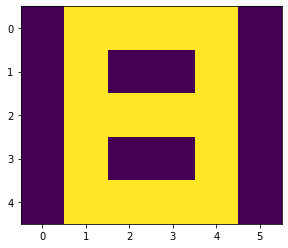

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

Step 3 :As the data set is in the form of list we will convert it into numpy array. 

In [ ]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


Step 4 : Defining the architecture or structure of the deep neural network. This includes deciding the number of layers and the number of nodes in each layer. Our neural network is going to have the following structure. 

1st layer: Input layer(1, 30)
2nd layer: Hidden layer (1, 5)
3rd layer: Output layer(3, 3)

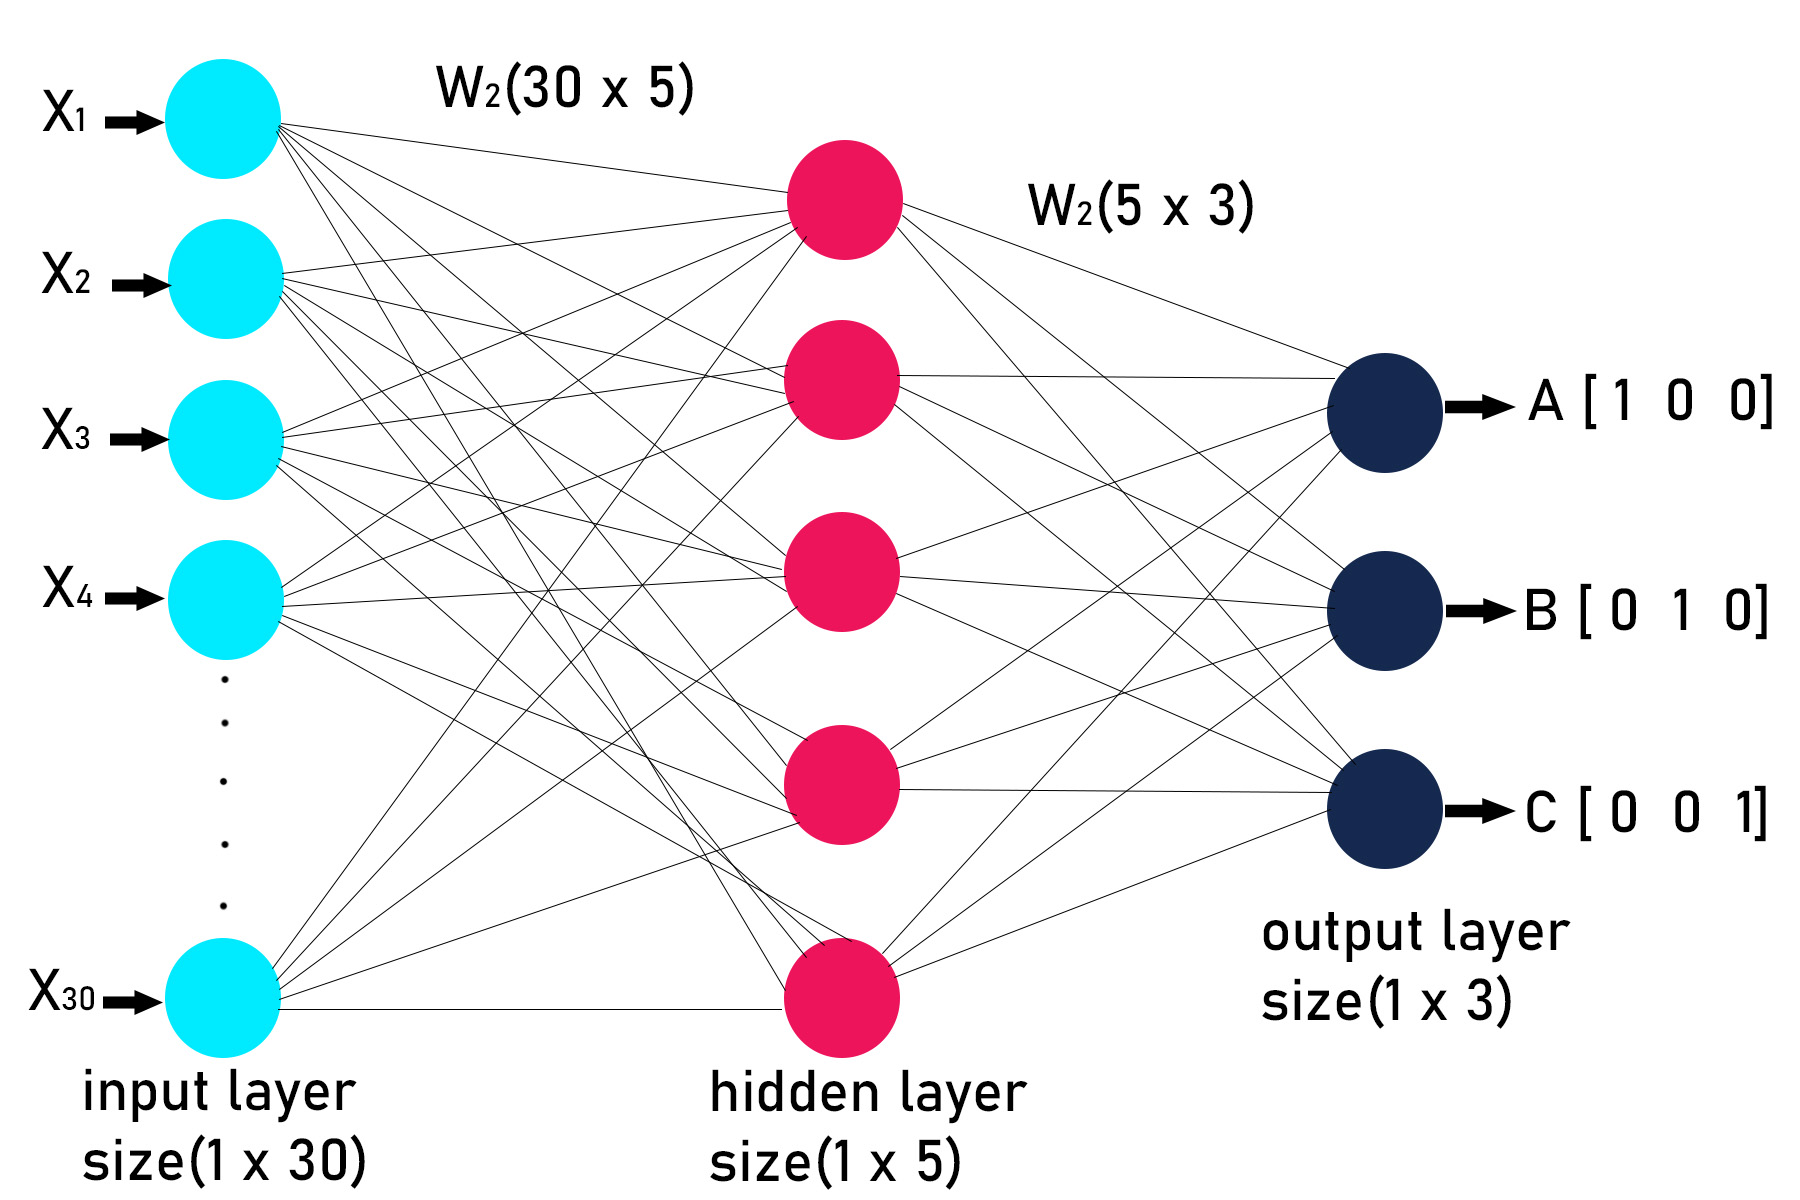

Step 5: Declaring and defining all the function to build deep neural network. 

In [ ]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()




Step 6: Initializing the weights, as the neural network is having 3 layers, so there will be 2 weight matrix associate with it. The size of each matrix depends on the number of nodes in two connecting layers. 

In [ ]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[ 6.30545775e-01 -2.17281913e+00  4.68729685e-01 -1.15653621e+00
   1.03065051e+00]
 [-1.28723893e-01 -8.60901636e-01  1.25051895e+00  6.50164640e-01
  -1.10447085e+00]
 [-3.84546574e-01 -6.51066680e-01  8.17804782e-01  5.25989543e-01
  -3.02065713e-02]
 [ 5.34461245e-01  6.60872702e-01 -8.02369975e-01 -7.59677189e-01
  -1.47195372e+00]
 [ 1.07666564e+00  9.70525217e-01  2.02492978e+00  5.24442944e-01
  -2.22309568e-01]
 [-4.82734291e-01 -3.44358055e-01  4.77501536e-01  1.14642499e+00
  -1.38059856e+00]
 [ 8.28275608e-01  1.34127546e+00 -8.36199088e-01  1.44171787e+00
  -1.53137052e-01]
 [ 8.31468045e-01 -1.77098487e+00  8.36365333e-02 -2.42453815e+00
   3.90044454e-01]
 [-1.12897043e-01  7.03665835e-01 -1.83845307e+00 -2.38749029e+00
  -1.03106665e-02]
 [-2.72166838e-01  8.87022215e-01 -1.17110825e+00  1.16680140e-02
   1.11056940e+00]
 [ 3.43863626e-01  1.23595132e+00  9.12027057e-01  6.61900155e-01
  -4.30112669e-01]
 [-1.51802037e+00  4.08402533e-01  4.99466744e-01 -3.26528123e-01

Step 7 : Training the model.

In [ ]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 68.26455366793822
epochs: 2 ======== acc: 70.60405974799393
epochs: 3 ======== acc: 72.37369537427318
epochs: 4 ======== acc: 73.62621885465985
epochs: 5 ======== acc: 74.55349235563686
epochs: 6 ======== acc: 75.28077903179648
epochs: 7 ======== acc: 75.87455894281548
epochs: 8 ======== acc: 76.37219756883374
epochs: 9 ======== acc: 76.7970308058421
epochs: 10 ======== acc: 77.16505701912375
epochs: 11 ======== acc: 77.48802265849737
epochs: 12 ======== acc: 77.77495955628501
epochs: 13 ======== acc: 78.03302141953006
epochs: 14 ======== acc: 78.26798238055059
epochs: 15 ======== acc: 78.48456133206209
epochs: 16 ======== acc: 78.68664978299937
epochs: 17 ======== acc: 78.87748199399877
epochs: 18 ======== acc: 79.0597677428653
epochs: 19 ======== acc: 79.23579907638391
epochs: 20 ======== acc: 79.40753787233326
epochs: 21 ======== acc: 79.57668866462394
epochs: 22 ======== acc: 79.74475986770541
epochs: 23 ======== acc: 79.91311572312279
epochs: 24 ======== ac

Step 8 : Plotting the graphs of loss and accuracy with respect to number of epochs(Iteration). 

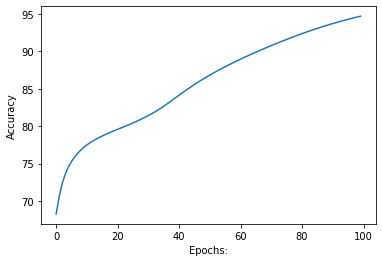

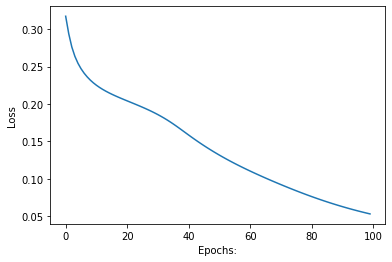

In [ ]:
import matplotlib.pyplot as plt1

# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [ ]:
# the trained weights are
print(w1, "\n", w2)


[[ 0.63054578 -2.17281913  0.46872968 -1.15653621  1.03065051]
 [ 0.41889536 -0.8222491   0.95301184  0.46059851 -1.35580717]
 [-0.16891598 -0.89172346  0.48092234  0.43475117 -0.28074977]
 [ 0.75009184  0.42021592 -1.13925241 -0.85091556 -1.72249692]
 [ 1.62428489  1.00917775  1.72742267  0.33487682 -0.47364589]
 [-0.48273429 -0.34435805  0.47750154  1.14642499 -1.38059856]
 [ 0.82827561  1.34127546 -0.83619909  1.44171787 -0.15313705]
 [ 1.04709864 -2.01164165 -0.25324591 -2.51577653  0.13950125]
 [-0.11289704  0.70366584 -1.83845307 -2.38749029 -0.01031067]
 [-0.27216684  0.88702222 -1.17110825  0.01166801  1.1105694 ]
 [ 0.54783629  1.5519405   0.90008001  0.42436212 -0.71963065]
 [-1.51802037  0.40840253  0.49946674 -0.32652812 -1.77487935]
 [-0.22674853 -1.01274467  0.35885568  0.86676305 -1.35966932]
 [-1.27503697 -2.03754116 -1.20940213  0.53223238 -0.25211675]
 [-0.35273684  1.47949576 -0.73598716 -0.12641346  0.05179087]
 [-0.70683324  0.10525539 -1.29410423  1.0583319   0.61

Step9: Making prediction. 

Image is of letter C.


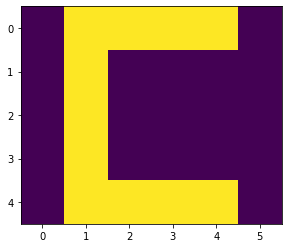

In [ ]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[2], w1, w2)
